<a href="https://colab.research.google.com/github/DavidParales/CODER_DS2/blob/main/ProyectoDS_2_Parales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROYECTO: Análisis de Ventas de Combustibles Líquidos Para Vehículo Automotor, Desde 2018 Hasta 2022, en Estaciones de Servicio de Distintas Empresas Según Su Ubicación en  Argentina.

------------------------INICIO DE PROYECTO ----------------------------------

1.	Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
2.	Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
3.	Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
4.	Identificar valores perdidos.

##ABSTRACT

El presente trabajo tiene como objetivo realizar un análisis de datos recolectados a partir de 2018 hasta el 2022, en estaciones de servicio ubicadas en Argentina; para ello se cuenta con un set de datos obtenidos de la Secretaría de Energía desde la página oficial https://datos.gob.ar/dataset.

Dichos datos se centran en variables claves como precios, volúmenes de ventas, tipo de combustible, geolocalización y características específicas de las empresas que surten a las estaciones de servicio.
Este proyecto permitirá comprender mejor las complejidades del mercado de combustibles, proporcionando información valiosa para la optimización de operaciones, toma de decisiones y una comprensión más profunda de los factores que afectan los precios y volúmenes de venta en estaciones de servicio específicas de diferentes regiones de Argentina.
Esto se logrará a través de un enfoque descriptivo que utiliza estadísticas y visualizaciones, un enfoque diagnóstico que busca identificar factores influyentes y patrones regionales.
Una futura combinación de este análisis con un enfoque predictivo (modelos para prever tendencias futuras), y un enfoque prescriptivo (proponer recomendaciones y estrategias para optimizar precios y volúmenes de ventas), proporcionará una visión completa y accionable del mercado de combustibles en Argentina.



##HIPÓTESIS

Se postula que existe una relación proporcional entre los precios de los combustibles, la geolocalización de las estaciones de servicio y los volúmenes de ventas. A través de un análisis detallado, se busca confirmar o refutar esta hipótesis, identificando factores clave que influyen en la dinámica del mercado de combustibles en Argentina.

##GLOSARIO

###Descripción de tablas y columnas
**EstaciónServicio**: Es la tabla que contiene detalles del punto de venta de combustible:
texto en negrita

•	NroInscrip (PK): Número que corresponde a un identificador único formado por la unión del número de inscripción del establecimiento junto a un número entero ascendente comenzando desde el uno, separados con una barra baja.

•	Nro_Inscripcion: Número que identifica al establecimiento donde se abastece el combustible líquido en las distintas zonas geográficas.

•	Operador: Se refiere a la empresa responsable del funcionamiento comercial, técnico y operativo de la estación de servicio.

•	Bandera: Se refiere a la marca del proveedor del combustible.

•	Id_direccion (FK): Es un dato foráneo que se obtiene de la tabla “Ubicación”. Consta de un identificador único relacionado a la estación de servicio.


**Combustible**: Esta tabla contiene detalles de la identificación del tipo de combustible líquido.

•	CombustibleID (PK): Es el identificador que distingue a cada combustible líquido.

•	Combustible_Tipo: Es el número asignado como identificador de cada tipo de combustible.
•	Producto: Corresponde al nombre del tipo de combustible abastecido.



**Abastecimiento**: Pertenece a la tabla que contiene las fechas y el costo del combustible según la cantidad abastecida. Relaciona a la tabla “EstacionDeServicio” con la tabla “Combustible”, por lo que tiene como claves foráneas, las identidades únicas de las estaciones de servicio y las del combustible.

•	NroInscrip_IdCombust (PK): Corresponde a una identificación que se generó combinando al identificador de cada combustible con el de la estación de servicio, separados por una barra diagonal.

•	NroInscrip (FK): Es la identificación de la estación de servicio donde se abastece el combustible.

•	CombustibleID (FK): Es el identificador del combustible líquido abastecido.

•	Anio: Corresponde al número entero que representa al año de la fecha en la cual se abasteció al combustible en una determinada estación de servicio, en una determinada zona geográfica.

•	Mes: Corresponde al número entero que representa al mes de la fecha en la cual se abasteció al combustible en una determinada estación de servicio de una ubicación específica.

•	Volumen: Corresponde a la cantidad, medida en metros cúbicos (1m3= 1000Litros), del combustible líquido especifico abastecido en una determinada fecha y en una determinada estación de servicio.

•	Precio: Corresponde al número, que puede ser entero o decimal, que representa al costo del volumen de combustible líquido específico abastecido en una determinada estación de servicio de una ubicación específica.

•	Fecha: Se refiere al mes y al año en la cual se abasteció al combustible.


**Ubicación**: Esta tabla permite geolocalizar la zona geográfica específica en la que se encuentra cada estación de servicio en la que se abastece combustible, según sus coordenadas geográficas, provincia, localidad y detalles concretos de su dirección.

•	Id_direccion (PK): Es un dato que consta de un identificador único formado por un número entero ascendente, desde el 1, junto a la ubicación del establecimiento donde opera la estación de servicio, separados por una barra baja.

•	Direccion: Son los detalles específicos (avenida, calle, ruta, entre otros) que describen y distinguen al lugar específico donde se encuentra una determinada estación de servicio de una localidad Argentina.

•	Localidad: Corresponde al nombre de la localidad, perteneciente a una determinada provincia Argentina, donde se encuentra una estación de servicio específica.

•	Provincia: Representa el nombre de la provincia Argentina, donde se ubica una estación de abastecimiento de combustible específica.

•	Latitud: Corresponde a la coordenada geográfica medida desde el ecuador hasta el paralelo donde se encuentra la estación de servicio. Todos los número son negativos porque se refieren a un punto en el hemisferio Sur, que es donde se ubica Argentina. Pueden ser números enteros o decimales, puesto que si el número es muy grande, va a estar representado en notación exponencial.    

•	Longitud: Corresponde a la coordenada geográfica medida desde el Meridiano 0° hasta el meridiano donde se encuentra la estación de servicio. Todos los número son negativos porque se refieren a un punto en el hemisferio Oeste, que es donde se ubica Argentina. Pueden ser números enteros o decimales, puesto que si el número es muy grande, va a estar representado en notación exponencial.


In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
#Importar las librerias
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #sobreescribe los parámetros internos de matplotlib para que utilice el estilo de Seaborn.
          #Los gráficos posteriores que realice tendrán un mejor aspecto.
#Carga de tablas
df_EstacionServicio = pd.read_csv('/content/drive/MyDrive/PROYECTO_FINAL_DS_DAVID_PARALES/PROYECTO DS2_DAVID_PARALES/Tablas _DataScience1/EstacionServicio.csv', encoding='latin1', delimiter=';')
#df_ = pd.read_csv('/content/drive/MyDrive/Tablas recuperatorio primer parcial-20240524/orders')
df_Combustible = pd.read_csv('/content/drive/MyDrive/PROYECTO_FINAL_DS_DAVID_PARALES/PROYECTO DS2_DAVID_PARALES/Tablas _DataScience1/Combustible.csv', encoding='latin1', delimiter=';')
df_Ubicacion = pd.read_csv('/content/drive/MyDrive/PROYECTO_FINAL_DS_DAVID_PARALES/PROYECTO DS2_DAVID_PARALES/Tablas _DataScience1/Ubicacion.csv', encoding='latin1', delimiter=';')
df_Abastecimiento = pd.read_csv('/content/drive/MyDrive/PROYECTO_FINAL_DS_DAVID_PARALES/PROYECTO DS2_DAVID_PARALES/Tablas _DataScience1/Abastecimiento.csv', encoding='latin1', delimiter=';')

EXPLORACIÓN DE LAS TABLAS:

In [68]:
df_EstacionServicio #Para habilitar la forma, descripción o información de la tabla, quite el "#" para realizar la observación pertinente
#df_EstacionServicio.shape
#df_EstacionServicio.describe().round(2)
#df_EstacionServicio.info()


,NroInscrip (PK),Nro_Inscripcion,Operador,Bandera,Id_direccion (FK)
0,104_1,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,1_AV. 25 DE MAYO 280
1,104_2,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,2_AV. 25 DE MAYO 280
2,104_3,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,3_AV. 25 DE MAYO 280
3,104_4,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,4_AV. 25 DE MAYO 280
4,107_5,107,MACHAGAI COMBUSTIBLES SRL,YPF,5_M.MORENO Y 25 DE MAYO
...,...,...,...,...,...
813895,10348_813896,10348,FRAN SA,SHELL C.A.P.S.A.,813896_AV GUTNISKY 3396
813896,10490_813897,10490,ENERGY COMBUSTIBLES S.R.L.,SHELL C.A.P.S.A.,813897_BV. COLON 2290
813897,10490_813898,10490,ENERGY COMBUSTIBLES S.R.L.,SHELL C.A.P.S.A.,813898_BV. COLON 2290
813898,10490_813899,10490,ENERGY COMBUSTIBLES S.R.L.,SHELL C.A.P.S.A.,813899_BV. COLON 2290


La tabla EstacionServicio, tiene 813900 entradas o registros y 5 features o variables.

In [69]:
df_Combustible #Para habilitar la forma, descripción o información de la tabla, quite el "#" para realizar la observación pertinente
#df_Combustible.shape
#df_Combustible.describe().round(2)
#df_Combustible.info()

,CombustibleID (PK),Combustible_Tipo,Producto,Unnamed: 3,
0,1_1,1,Gas Oil Grado 2,NaN,NaN
1,2_2,2,Nafta (premium) de más de 95 Ron,NaN,NaN
2,3_3,3,Nafta (súper) entre 92 y 95 Ron,NaN,NaN
3,4_4,4,Gas Oil Grado 3,NaN,NaN
4,5_3,3,Nafta (súper) entre 92 y 95 Ron,NaN,NaN
...,...,...,...,...,...
813895,813896_1,1,Gas Oil Grado 2,NaN,NaN
813896,813897_1,1,Gas Oil Grado 2,NaN,NaN
813897,813898_3,3,Nafta (súper) entre 92 y 95 Ron,NaN,NaN
813898,813899_2,2,Nafta (premium) de más de 95 Ron,NaN,NaN


In [70]:
df_Ubicacion#Para habilitar la forma, descripción o información de la tabla, quite el "#" para realizar la observación pertinente
#df_Ubicacion.shape
#df_Ubicacion.describe().round(2)
#df_Ubicacion.info()


,Id_direccion (PK),Direccion,Localidad,Provincia,Latitud,Longitud
0,1_AV. 25 DE MAYO 280,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
1,2_AV. 25 DE MAYO 280,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
2,3_AV. 25 DE MAYO 280,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
3,4_AV. 25 DE MAYO 280,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
4,5_M.MORENO Y 25 DE MAYO,M.MORENO Y 25 DE MAYO,MACHAGAY,CHACO,-269247,"-6004693,00"
...,...,...,...,...,...,...
813895,813896_AV GUTNISKY 3396,AV GUTNISKY 3396,FORMOSA,FORMOSA,-2619418,"-5820045,00"
813896,813897_BV. COLON 2290,BV. COLON 2290,CASILDA,SANTA FE,-330549044,"-611608868,00"
813897,813898_BV. COLON 2290,BV. COLON 2290,CASILDA,SANTA FE,-330549044,"-611608868,00"
813898,813899_BV. COLON 2290,BV. COLON 2290,CASILDA,SANTA FE,-330549044,"-611608868,00"


In [71]:
df_Abastecimiento#Para habilitar la forma, descripción o información de la tabla, quite el "#" para realizar la observación pertinente
#df_Ubicacion.shape
#df_Ubicacion.describe().round(2)
#df_Ubicacion.info()

,NroInscrip_IdCombust (PK),NroInscrip (FK),CombustibleID (FK),Anio,Mes,Volumen,Precio,Fecha
0,104_1/1_1,104_1,1_1,2018,1,31762.00,230998.0,2018/1
1,104_2/2_2,104_2,2_2,2018,1,130145.00,305659.0,2018/1
2,104_3/3_3,104_3,3_3,2018,1,193071.00,183275.0,2018/1
3,104_4/4_4,104_4,4_4,2018,1,65499.00,27052.0,2018/1
4,107_5/5_3,107_5,5_3,2018,1,277.03,265309.0,2018/1
...,...,...,...,...,...,...,...,...
813895,10348_813896/813896_1,10348_813896,813896_1,2022,6,76.08,143313.0,2022/6
813896,10490_813897/813897_1,10490_813897,813897_1,2022,6,17.03,162372.0,2022/6
813897,10490_813898/813898_3,10490_813898,813898_3,2022,6,10.23,134.9,2022/6
813898,10490_813899/813899_2,10490_813899,813899_2,2022,6,3.91,163.4,2022/6


LIMPIEZA DE LOS DATOS

In [72]:
#Eliminar columnas finales de la tabla "Combustible", que están sin datos
#df_Combustible_clean = df_Combustible.loc[:, ~df_Combustible.columns.str.contains('^Unnamed')]
df_Combustible = df_Combustible.drop(columns=df_Combustible.columns[-2:])
print(df_Combustible.head())
print(df_Combustible.shape)

  CombustibleID (PK)  Combustible_Tipo                          Producto
0                1_1                 1                   Gas Oil Grado 2
1                2_2                 2  Nafta (premium) de más de 95 Ron
2                3_3                 3   Nafta (súper) entre 92 y 95 Ron
3                4_4                 4                   Gas Oil Grado 3
4                5_3                 3   Nafta (súper) entre 92 y 95 Ron
(813900, 3)


In [73]:
#Transformar datos de string a tipo fecha, en la columna"Fecha" de la Tabla "Abastecimiento"
df_Abastecimiento['Fecha'] = pd.to_datetime(df_Abastecimiento['Fecha'], format='%Y/%m')

# Verificar la estructura de df_Abastecimiento después de la conversión
df_Abastecimiento.head()
#print(df_Abastecimiento.dtypes)

,NroInscrip_IdCombust (PK),NroInscrip (FK),CombustibleID (FK),Anio,Mes,Volumen,Precio,Fecha
0,104_1/1_1,104_1,1_1,2018,1,31762.00,230998.0,2018-01-01
1,104_2/2_2,104_2,2_2,2018,1,130145.00,305659.0,2018-01-01
2,104_3/3_3,104_3,3_3,2018,1,193071.00,183275.0,2018-01-01
3,104_4/4_4,104_4,4_4,2018,1,65499.00,27052.0,2018-01-01
4,107_5/5_3,107_5,5_3,2018,1,277.03,265309.0,2018-01-01


In [74]:
# Renombrar columnas que contienen '(FK)' y '(PK)'en su nombre

df_Combustible = df_Combustible.rename(columns={'CombustibleID (PK)': 'CombustibleID'})

df_Abastecimiento = df_Abastecimiento.rename(columns={'NroInscrip_IdCombust (PK)':'NroInscrip_IdCombust',	'NroInscrip (FK)': 'NroInscrip', 'CombustibleID (FK)': 'CombustibleID'})

df_EstacionServicio = df_EstacionServicio.rename(columns={'NroInscrip (PK)': 'NroInscrip', 'Id_direccion (FK)': 'Id_direccion'})

df_Ubicacion = df_Ubicacion.rename(columns={'Id_direccion (PK)': 'Id_direccion'})

df_Combustible

,CombustibleID,Combustible_Tipo,Producto
0,1_1,1,Gas Oil Grado 2
1,2_2,2,Nafta (premium) de más de 95 Ron
2,3_3,3,Nafta (súper) entre 92 y 95 Ron
3,4_4,4,Gas Oil Grado 3
4,5_3,3,Nafta (súper) entre 92 y 95 Ron
...,...,...,...
813895,813896_1,1,Gas Oil Grado 2
813896,813897_1,1,Gas Oil Grado 2
813897,813898_3,3,Nafta (súper) entre 92 y 95 Ron
813898,813899_2,2,Nafta (premium) de más de 95 Ron


REDUCCIÓN DEL TIEMPO DE EJECUCIÓN

Cada tabla tiene 813.900 regisros. Se hace necario reducir la cantidad de datos, para la visualizacion del codigo y acelerar la ejecución del código, para ello se realiza un muestreo estadísticamente representativo. Una manera de hacerlo es usando la función sample de pandas para tomar una muestra aleatoria de los datos.

**Con fines de limitar el proyecto a un alcance factible al tiempo del curso**: Se acotarán los objetivos a una localidad específica y se tomarán valores estadísticos para hacerlo representativo de los valores de cada localidad.  


ESTE CÓDIGO SE EJECUTABA EN UN INICIO SEGÚN ENTENDIMIENTO INICIAL DEL PROYECTO- AHORA LO DEJO COMENTADO, POR SI PUEDA USARSE EN UN FUTURO POR ALGÚN AJUSTE NECESARIO

In [75]:
# Configurar la semilla para reproducibilidad
#seed = 42

# Definir el porcentaje de muestreo (0.1% de los datos originales)
#sampling_fraction = 0.001

# Reducir la cantidad de datos en cada DataFrame

# Tomar una muestra del 0.1% de cada DataFrame
#df_EstacionServicio_sample = df_EstacionServicio.sample(frac=sampling_fraction, random_state=seed)
#df_Combustible_sample = df_Combustible.sample(frac=sampling_fraction, random_state=seed)
#df_Ubicacion_sample = df_Ubicacion.sample(frac=sampling_fraction, random_state=seed)
#df_Abastecimiento_sample = df_Abastecimiento.sample(frac=sampling_fraction, random_state=seed)

# Verificar la cantidad de registros en cada muestra
#print("df_EstacionServicio_sample:", len(df_EstacionServicio_sample))
#print("df_Combustible_sample:", len(df_Combustible_sample))
#print("df_Ubicacion_sample:", len(df_Ubicacion_sample))
#print("df_Abastecimiento_sample:", len(df_Abastecimiento_sample))


#¿Por qué se usa una semilla?
# """El 42 en este contexto es un valor numérico que se utiliza como "semilla" para un generador de números aleatorios.
# Los generadores de números aleatorios (RNG) en realidad no producen números completamente aleatorios. En su lugar, utilizan algoritmos para generar secuencias de números que parecen aleatorios. La semilla es un valor inicial que "inicia" el algoritmo.

# ¿Qué hace el 42?
# Cuando estableces la semilla en 42, le dices al generador de números aleatorios que comience su secuencia usando ese valor específico. Esto significa que cada vez que ejecutes el código con la semilla 42, el generador generará la misma secuencia de números "aleatorios".

# ¿Por qué es importante?
# Esto es útil para la reproducibilidad. Si estás trabajando en un proyecto que involucra generación de números aleatorios, es importante poder obtener los mismos resultados cada vez que ejecutas el código. Esto te ayuda a depurar tu código, reproducir resultados para análisis y compartir tu trabajo con otros.

# En resumen: El 42, o el número escogido, es simplemente un número que se utiliza para configurar el generador de números aleatorios y asegurar la reproducibilidad de los resultados.
# Se puede elegir cualquier número, pero 42 es un valor comúnmente usado por convención."""

LO ANTERIOR NO ES DEL TODO REPRESENTATIVO DE LOS DATOS. DEBIDO A QUE SE DEJAN DE CONSIDERAR MUCHOS REGISTROS.

PARA REALIZAR EL PROCEDIMIENTO CORRECTO PARA EL ESTUDIO, SE DECIDE TRABAJAR CON TODAS LAS MUESTRAS Y REALIZAR LO SIGUIENTE.


# **Con fines de limitar el proyecto a un alcance factible al tiempo del curso**:
Se acotarán los objetivos a una localidad específica y se tomarán valores estadísticos para hacerlo representativo de los valores de cada localidad.

Para ello, primero necesito unir en una misma tabla o en un solo dataset mis cuatro dataset de cada tabla , para que de esta manera me queden todas las columas en un mismo dataset y despues poder manipular mis  datos y filtrarlos por provincia y localidad

In [76]:

# Unión de los datasets usando merge
df_merged = df_Abastecimiento \
    .merge(df_EstacionServicio, on='NroInscrip', how='left') \
    .merge(df_Combustible, on='CombustibleID', how='left') \
    .merge(df_Ubicacion, on='Id_direccion', how='left')

# Verificar la tabla combinada
df_merged.head()
#f_merged.shape

,NroInscrip_IdCombust,NroInscrip,CombustibleID,Anio,Mes,Volumen,Precio,Fecha,Nro_Inscripcion,Operador,Bandera,Id_direccion,Combustible_Tipo,Producto,Direccion,Localidad,Provincia,Latitud,Longitud
0,104_1/1_1,104_1,1_1,2018,1,31762.00,230998.0,2018-01-01,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,1_AV. 25 DE MAYO 280,1,Gas Oil Grado 2,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
1,104_2/2_2,104_2,2_2,2018,1,130145.00,305659.0,2018-01-01,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,2_AV. 25 DE MAYO 280,2,Nafta (premium) de más de 95 Ron,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
2,104_3/3_3,104_3,3_3,2018,1,193071.00,183275.0,2018-01-01,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,3_AV. 25 DE MAYO 280,3,Nafta (súper) entre 92 y 95 Ron,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
3,104_4/4_4,104_4,4_4,2018,1,65499.00,27052.0,2018-01-01,104,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,4_AV. 25 DE MAYO 280,4,Gas Oil Grado 3,AV. 25 DE MAYO 280,RESISTENCIA,CHACO,-27448803,"-5898882,00"
4,107_5/5_3,107_5,5_3,2018,1,277.03,265309.0,2018-01-01,107,MACHAGAI COMBUSTIBLES SRL,YPF,5_M.MORENO Y 25 DE MAYO,3,Nafta (súper) entre 92 y 95 Ron,M.MORENO Y 25 DE MAYO,MACHAGAY,CHACO,-269247,"-6004693,00"


ELIJO BUENOS AIRES PORQUE ES LA PROVINCIA CON MAYOR NÚMERO DE DATOS

<ipython-input-77-f719f26177a4>:76: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  world.plot(ax=ax, color='lightgrey', aspect=1.5, edgecolor='black')


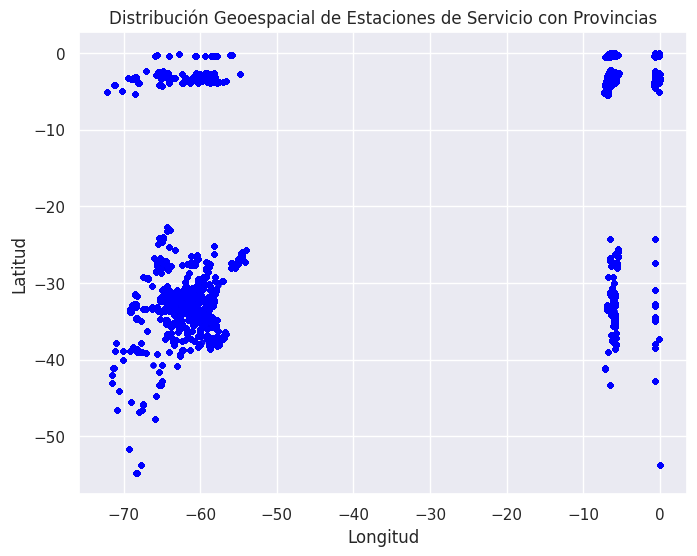

In [77]:
# Fusionar df_EstacionServicio con df_Ubicacion para obtener las coordenadas
df_merged_location = df_EstacionServicio.merge(df_Ubicacion, on='Id_direccion', how='left')

# Mostrar algunas filas para inspeccionar los datos originales
#print("Datos originales:")
#print(df_merged_location[['Longitud', 'Latitud']].head())

# Reemplazar comas por puntos en las columnas de 'Longitud' y 'Latitud'
df_merged_location['Longitud'] = df_merged_location['Longitud'].str.replace(',', '.')
df_merged_location['Latitud'] = df_merged_location['Latitud'].str.replace(',', '.')

# Mostrar algunas filas después de reemplazar comas
#print("Después de reemplazar comas:")
#print(df_merged_location[['Longitud', 'Latitud']].head())

# Convertir las columnas de 'Longitud' y 'Latitud' a tipo float
df_merged_location['Longitud'] = pd.to_numeric(df_merged_location['Longitud'], errors='coerce')
df_merged_location['Latitud'] = pd.to_numeric(df_merged_location['Latitud'], errors='coerce')

# Mostrar algunas filas después de la conversión
#print("Después de la conversión a numérico:")
#print(df_merged_location[['Longitud', 'Latitud']].head())

# Verificar si las coordenadas parecen estar fuera de escala y ajustar si es necesario
# Asumiendo que las coordenadas están en el rango -18000000 a 18000000 y -9000000 a 9000000
# Dividimos por 1000000 para ajustar las coordenadas
df_merged_location['Longitud'] = df_merged_location['Longitud'] / 1000000
df_merged_location['Latitud'] = df_merged_location['Latitud'] / 1000000


# Mostrar algunas filas después de ajustar las coordenadas
#print("Después de ajustar las coordenadas:")
#print(df_merged_location[['Longitud', 'Latitud']].head())

# Eliminar filas con valores vacíos o inválidos en 'Longitud' y 'Latitud'
df_merged_location = df_merged_location.dropna(subset=['Longitud', 'Latitud'])

# Verificar que las coordenadas estén en el rango geográfico esperado
df_merged_location = df_merged_location[
    (df_merged_location['Longitud'] >= -180) & (df_merged_location['Longitud'] <= 0) &
    (df_merged_location['Latitud'] >= -90) & (df_merged_location['Latitud'] <= 0)
]

# Mostrar estadísticas de las coordenadas
#print("Estadísticas de coordenadas después del filtrado:")
#print(df_merged_location[['Longitud', 'Latitud']].describe())

# Mostrar la cantidad de filas restantes después del filtrado
#print(f"Filas restantes después del filtrado: {len(df_merged_location)}")

# Verificar si hay alguna fila restante
#if len(df_merged_location) > 0:

# Crear un GeoDataFrame a partir de df_merged_location
gdf = gpd.GeoDataFrame(df_merged_location,
        geometry=gpd.points_from_xy(df_merged_location.Longitud, df_merged_location.Latitud)
    )

# Cargar el mapa base
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) ----ESTO SE HACÍA CON UNA VERSIÓN ANTERIOR


# Reemplaza con la ruta local del archivo .shp descargado
shapefile_path = '/content/drive/MyDrive/PROYECTO_FINAL_DS_DAVID_PARALES/PROYECTO DS2_DAVID_PARALES/110m_cultural/ne_110m_admin_1_states_provinces.shx'

world = gpd.read_file(shapefile_path, layer='ne_110m_admin_1_states_provinces')

# Filtrar por el país de interés
country_name = 'Argentina'
world = world[world['name'] == country_name]

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el mapa base de las provincias con bordes
world.plot(ax=ax, color='lightgrey', aspect=1.5, edgecolor='black')

# Graficar las estaciones de servicio
gdf.plot(ax=ax, color='blue', markersize=10, alpha=0.6)

plt.title('Distribución Geoespacial de Estaciones de Servicio con Provincias')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


Tomar solo los datos de Buenos Aires (BA) de cada DataFrame

In [78]:
# Filtrar los datos para Buenos Aires (BA)
df_buenos_aires = df_merged[df_merged['Provincia'] == 'BUENOS AIRES']
df_buenos_aires
# Verificar la cantidad de registros en la muestra de Buenos Aires
#print("df_buenos_aires:", len(df_buenos_aires))


,NroInscrip_IdCombust,NroInscrip,CombustibleID,Anio,Mes,Volumen,Precio,Fecha,Nro_Inscripcion,Operador,Bandera,Id_direccion,Combustible_Tipo,Producto,Direccion,Localidad,Provincia,Latitud,Longitud
12,109_13/13_2,109_13,13_2,2018,1,52.76,27.39,2018-01-01,109,AGROMARE SRL,YPF,13_CALLE 29 Y DIAGONAL 61,2,Nafta (premium) de más de 95 Ron,CALLE 29 Y DIAGONAL 61,VERONICA,BUENOS AIRES,-353903,"-5733949,00"
13,109_14/14_4,109_14,14_4,2018,1,56.70,24.32,2018-01-01,109,AGROMARE SRL,YPF,14_CALLE 29 Y DIAGONAL 61,4,Gas Oil Grado 3,CALLE 29 Y DIAGONAL 61,VERONICA,BUENOS AIRES,-353903,"-5733949,00"
14,109_15/15_1,109_15,15_1,2018,1,58.74,21.18,2018-01-01,109,AGROMARE SRL,YPF,15_CALLE 29 Y DIAGONAL 61,1,Gas Oil Grado 2,CALLE 29 Y DIAGONAL 61,VERONICA,BUENOS AIRES,-353903,"-5733949,00"
15,109_16/16_3,109_16,16_3,2018,1,143.79,23.67,2018-01-01,109,AGROMARE SRL,YPF,16_CALLE 29 Y DIAGONAL 61,3,Nafta (súper) entre 92 y 95 Ron,CALLE 29 Y DIAGONAL 61,VERONICA,BUENOS AIRES,-353903,"-5733949,00"
16,110_17/17_2,110_17,17_2,2018,1,43.38,27.39,2018-01-01,110,AGROMARE SRL,YPF,17_RUTA 36 KM 121,2,Nafta (premium) de más de 95 Ron,RUTA 36 KM 121,VIEYTES,BUENOS AIRES,-3527978,"-5757332,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813887,10259_813888/813888_3,10259_813888,813888_3,2022,6,140271.00,134.80,2022-06-01,10259,OIL SUMINISTROS SA,YPF,813888_AVENIDA COLON 671,3,Nafta (súper) entre 92 y 95 Ron,AVENIDA COLON 671,BAHIA BLANCA,BUENOS AIRES,-3872496,"-62275,00"
813888,10332_813889/813889_3,10332_813889,813889_3,2022,6,57.72,140.20,2022-06-01,10332,RED DE SERVICIOS RURALES S.R.L,SHELL C.A.P.S.A.,813889_AV.TUCUMAN 2384,3,Nafta (súper) entre 92 y 95 Ron,AV.TUCUMAN 2384,SAN BERNARDO,BUENOS AIRES,-36691807,"-56684446,00"
813889,10332_813890/813890_4,10332_813890,813890_4,2022,6,21.82,206.60,2022-06-01,10332,RED DE SERVICIOS RURALES S.R.L,SHELL C.A.P.S.A.,813890_AV.TUCUMAN 2384,4,Gas Oil Grado 3,AV.TUCUMAN 2384,SAN BERNARDO,BUENOS AIRES,-36691807,"-56684446,00"
813890,10332_813891/813891_2,10332_813891,813891_2,2022,6,22.97,168.50,2022-06-01,10332,RED DE SERVICIOS RURALES S.R.L,SHELL C.A.P.S.A.,813891_AV.TUCUMAN 2384,2,Nafta (premium) de más de 95 Ron,AV.TUCUMAN 2384,SAN BERNARDO,BUENOS AIRES,-36691807,"-56684446,00"


Ahora podemos trabajar sobre estos 304.637 registros

#Aplicación de estadísticas a los datos de Buenos Aires
Solo nos vamos a centrar en Buenos Aires, pudiese hacerse el estudio por cualquier otra provincia en particular, se puede filtrar los datos por provincia antes de calcular las siguientes estadísticas por localidad:

In [79]:
# Agrupar por localidad dentro de Buenos Aires y calcular estadísticas
grupo_ba = df_buenos_aires.groupby('Localidad')

estadisticas_ba = grupo_ba.agg({
    'Volumen': ['sum', 'mean', 'median', 'std'],
    'Precio': ['mean', 'median', 'std'],
    'Anio': ['min', 'max'],
    'Mes': ['min', 'max']
}).reset_index()

# Renombrar columnas
estadisticas_ba.columns = ['Localidad',
                           'Volumen_Total', 'Volumen_Promedio', 'Volumen_Mediana', 'Volumen_Desviacion',
                           'Precio_Promedio', 'Precio_Mediana', 'Precio_Desviacion',
                           'Anio_Inicial', 'Anio_Final',
                           'Mes_Inicial', 'Mes_Final']

# Visualizar estadísticas de Buenos Aires
estadisticas_ba

,Localidad,Volumen_Total,Volumen_Promedio,Volumen_Mediana,Volumen_Desviacion,Precio_Promedio,Precio_Mediana,Precio_Desviacion,Anio_Inicial,Anio_Final,Mes_Inicial,Mes_Final
0,25 DE MAYO,1.448886e+07,31773.822254,75.655,54449.470924,16900.827368,101.600,32298.196166,2018,2022,1,12
1,3 DE FEBRERO,4.012340e+06,15140.904113,67.210,30812.802055,151732.872151,106.420,229928.822910,2018,2022,1,12
2,30 DE AGOSTO,2.513491e+07,79540.851044,33924.500,126589.329354,99352.748987,84.085,252457.309684,2018,2022,1,12
3,9 DE ABRIL,5.176971e+07,42538.789942,5956.000,66164.462404,33514.734634,108.950,99337.190410,2018,2022,1,12
4,9 DE JULIO,7.645450e+07,46505.171864,135.205,79729.568791,37945.915554,21475.500,59153.727135,2018,2022,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...
323,VILLARINO,1.273429e+04,69.968615,8.835,407.503439,191217.359341,106140.000,192093.123626,2018,2022,1,12
324,VIRREY DEL PINO,6.372891e+07,61043.021959,14932.000,84707.483541,130922.041044,111.200,236678.005848,2018,2022,1,12
325,VIRREYES,1.187117e+07,27479.558544,11000.000,47634.570076,2294.891505,56.445,8701.811022,2018,2022,1,12
326,WILDE,5.788210e+07,39083.118042,142.500,60865.619837,55592.406604,70.480,150059.848652,2018,2022,1,12


##ANALISIS Y VISUALIZACIONES DE LOS DATOS

Comparación de volúmenes de venta entre localidades
Este análisis permite identificar qué localidades tienen los mayores volúmenes de venta. Se usará un gráfico para visualizar la comparación.

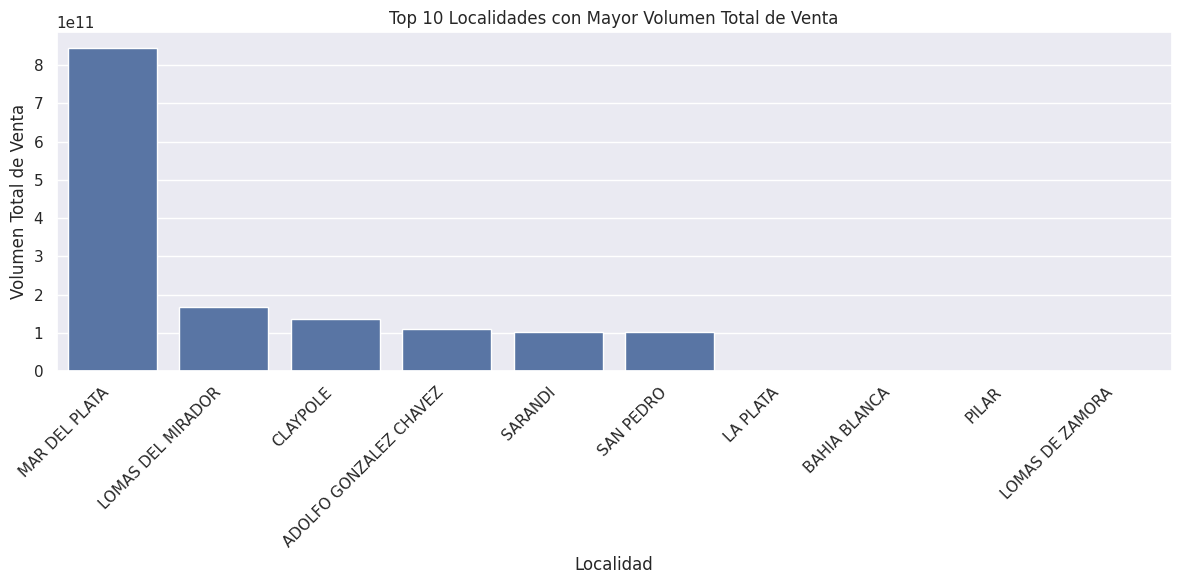

In [80]:
# prompt: Comparación de volúmenes de venta entre localidades Este análisis permite identificar qué localidades tienen los mayores volúmenes de venta. Se usará un gráfico para visualizar la comparación.

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x='Localidad', y='Volumen_Total', data=estadisticas_ba.sort_values('Volumen_Total', ascending=False).head(10))
plt.title('Top 10 Localidades con Mayor Volumen Total de Venta')
plt.xlabel('Localidad')
plt.ylabel('Volumen Total de Venta')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Abreviación de nombres de localidades

Podemos abreviar los nombres de las localidades para que sean más cortos y legibles en el gráfico.

In [81]:
# Ejemplo de abreviaciones manuales
abreviaciones = {
    'Localidad Largo Nombre 1': 'LLN1',
    'Localidad Largo Nombre 2': 'LLN2',
    # Añadir más abreviaciones según sea necesario
}

# Reemplazar nombres de localidades en el DataFrame
df_buenos_aires['Localidad_Abreviada'] = df_buenos_aires['Localidad'].map(abreviaciones).fillna(df_buenos_aires['Localidad'])

<ipython-input-81-7209e8f21948>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buenos_aires['Localidad_Abreviada'] = df_buenos_aires['Localidad'].map(abreviaciones).fillna(df_buenos_aires['Localidad'])


<ipython-input-82-f7dc9dabaf2f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_localidades, x='Volumen', y='Localidad_Abreviada', palette='viridis')


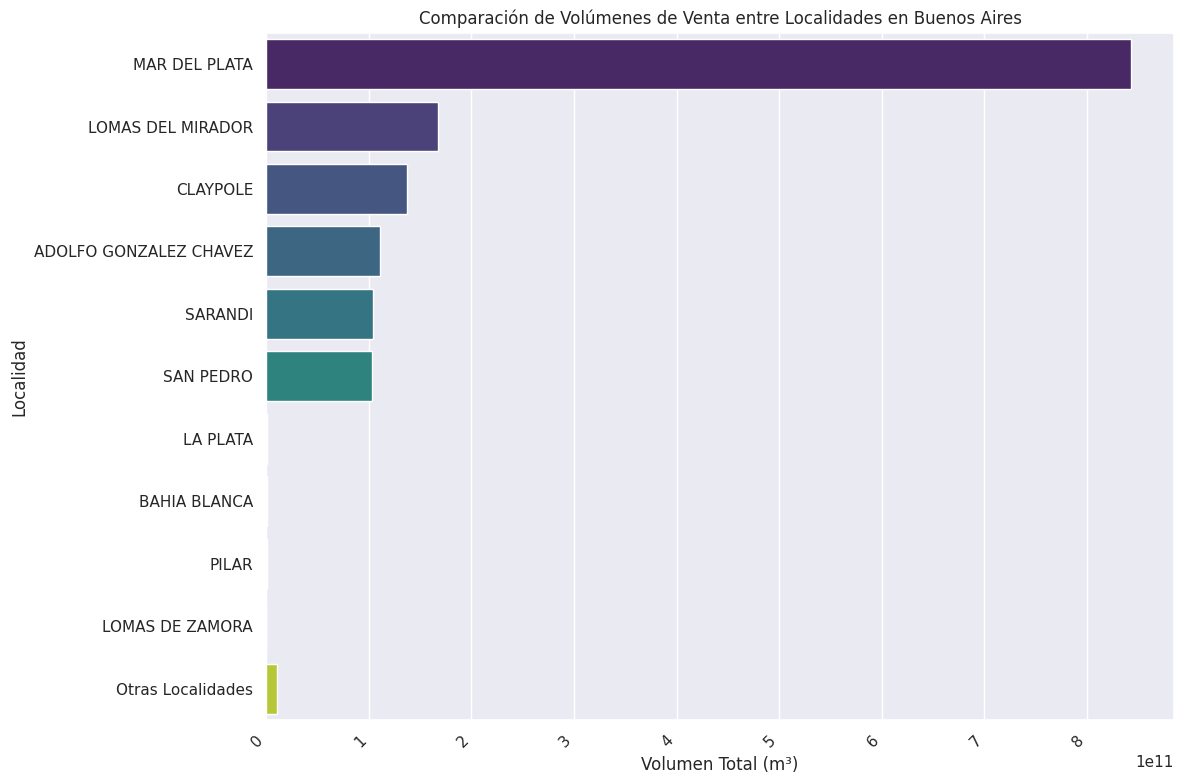

In [82]:
# Agrupar y sumar volúmenes de ventas
volumen_localidades = df_buenos_aires.groupby('Localidad_Abreviada')['Volumen'].sum().reset_index()

# Ordenar por volumen total para mejor visualización
volumen_localidades = volumen_localidades.sort_values(by='Volumen', ascending=False)

# Seleccionar las top 10 localidades para mostrar y agrupar el resto
top_localidades = volumen_localidades.head(10)
otras_localidades = volumen_localidades.iloc[10:]
otras_localidades_suma = otras_localidades['Volumen'].sum()

# Usar pandas.concat para agregar un nuevo registro al DataFrame
top_localidades = pd.concat([top_localidades, pd.DataFrame({'Localidad_Abreviada': ['Otras Localidades'],'Volumen': [otras_localidades_suma]})], ignore_index=True)


# Configurar el gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=top_localidades, x='Volumen', y='Localidad_Abreviada', palette='viridis')

# Mejorar la visualización
plt.title('Comparación de Volúmenes de Venta entre Localidades en Buenos Aires')
plt.xlabel('Volumen Total (m³)')
plt.ylabel('Localidad')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones

plt.show()

Interpretación: Este gráfico de barras muestra las localidades ordenadas por volumen total de ventas. Te permitirá ver claramente cuáles son las localidades con mayor y menor volumen de ventas, lo que puede indicar mercados más activos o más débiles. En este caso destaca MAR DEL PLATA

#Análisis de la variación de precios a lo largo del tiempo

Para analizar cómo han variado los precios en diferentes localidades a lo largo del tiempo, se crea un gráfico de líneas que muestra la evolución del precio medio por localidad y mes.
Primero, aseguramos de tener una columna con la fecha adecuada en df_buenos_aires y que los datos están agrupados por tiempo.


<ipython-input-83-b3100518cb76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buenos_aires['Fecha'] = pd.to_datetime(df_buenos_aires['Fecha'], errors='coerce')


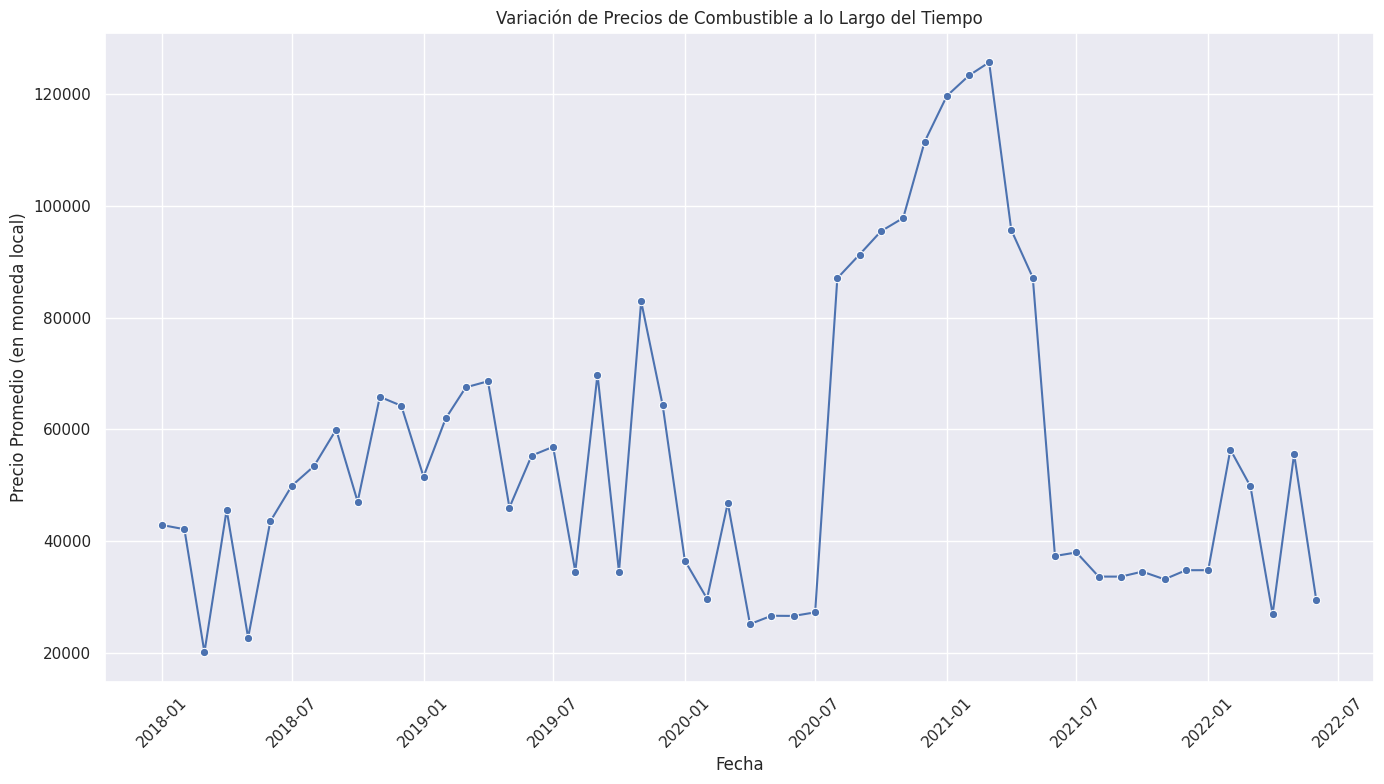

In [83]:
# Convertir la columna 'Fecha' a formato datetime si aún no está en ese formato
df_buenos_aires['Fecha'] = pd.to_datetime(df_buenos_aires['Fecha'], errors='coerce')

# Agrupar los datos por fecha y calcular el precio promedio
precio_promedio = df_buenos_aires.groupby(df_buenos_aires['Fecha'].dt.to_period('M')).agg({'Precio': 'mean'}).reset_index()
precio_promedio['Fecha'] = precio_promedio['Fecha'].dt.to_timestamp()  # Convertir Period a Timestamp

# Configurar el gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=precio_promedio, x='Fecha', y='Precio', marker='o', color='b')

# Mejorar la visualización
plt.title('Variación de Precios de Combustible a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (en moneda local)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar etiquetas de fechas para mayor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones

plt.show()

Interpretación: Este gráfico muestra cómo han evolucionado los precios promedio a lo largo del tiempo en Buenos Aires, sin distinguir entre localidades. Con lo que se puede distinguir un claro aumento para el año 2021, lo que pudo ser causado por la fuerte inflación en época de pandemia.

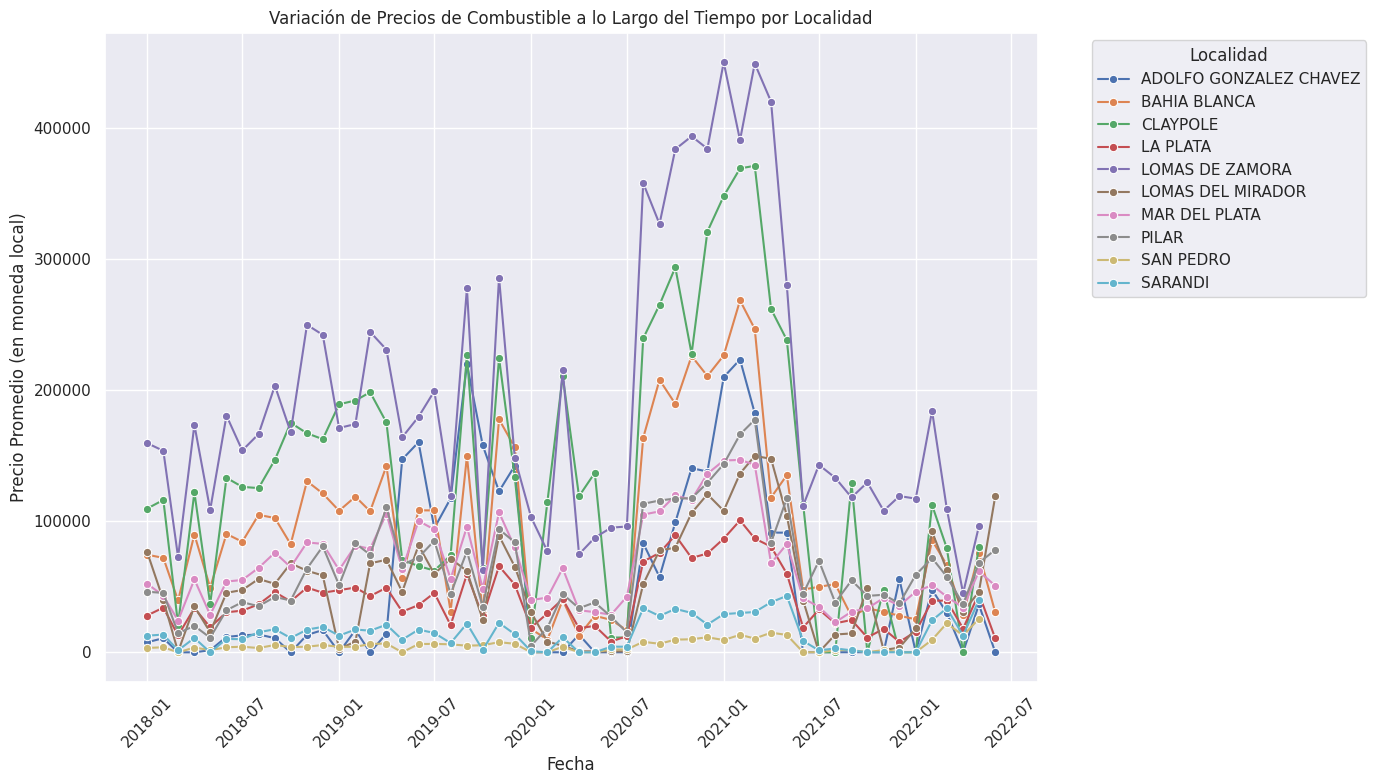

In [84]:
# Agrupar por localidad y fecha, y calcular el precio promedio
df_precio_localidad_fecha = df_buenos_aires.groupby(['Localidad_Abreviada', df_buenos_aires['Fecha'].dt.to_period('M')]).agg({'Precio': 'mean'}).reset_index()
df_precio_localidad_fecha['Fecha'] = df_precio_localidad_fecha['Fecha'].dt.to_timestamp()

# Filtrar solo las localidades top
df_precio_localidad_fecha = df_precio_localidad_fecha[df_precio_localidad_fecha['Localidad_Abreviada'].isin(top_localidades['Localidad_Abreviada'])]

# Configurar el gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_precio_localidad_fecha, x='Fecha', y='Precio', hue='Localidad_Abreviada', marker='o')

# Mejorar la visualización
plt.title('Variación de Precios de Combustible a lo Largo del Tiempo por Localidad')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio (en moneda local)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotar etiquetas de fechas para mayor legibilidad
plt.legend(title='Localidad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mejorar la ubicación de la leyenda
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones

plt.show()

Interpretación: Este gráfico muestra cómo han evolucionado los precios promedio en diferentes localidades a lo largo del tiempo. Permite observar tendencias de aumento o disminución en los precios, lo que puede estar relacionado con factores económicos, cambios en la oferta y demanda, entre otros.
Este enfoque proporciona una visualización clara de la variación de precios a lo largo del tiempo, resaltando las localidades más importantes y agrupando las demás.
Resaltan entre todas, Lomas de Zamora y Claypole.

#Identificación de localidades con volúmenes de ventas o precios anómalos

Para detectar anomalías, se buscan localidades cuyos volúmenes de ventas o precios se desvíen significativamente del promedio general. Una forma sencilla es calcular los z-scores.

In [85]:
from scipy.stats import zscore

# Calcular el z-score del volumen y precio
estadisticas_ba['Z_Volumen'] = zscore(estadisticas_ba['Volumen_Total'])
estadisticas_ba['Z_Precio'] = zscore(estadisticas_ba['Precio_Promedio'])

# Filtrar localidades con volúmenes o precios anómalos (absoluto z-score > 2)
anomalías_volumen = estadisticas_ba[estadisticas_ba['Z_Volumen'].abs() > 2]
anomalías_precio = estadisticas_ba[estadisticas_ba['Z_Precio'].abs() > 2]

print("Localidades con volúmenes de ventas anómalos:")
print(anomalías_volumen[['Localidad', 'Volumen_Total', 'Z_Volumen']])

print("\nLocalidades con precios anómalos:")
print(anomalías_precio[['Localidad', 'Precio_Promedio', 'Z_Precio']])

Localidades con volúmenes de ventas anómalos:
                  Localidad  Volumen_Total  Z_Volumen
8    ADOLFO GONZALEZ CHAVEZ   1.111244e+11   2.180372
70                 CLAYPOLE   1.372782e+11   2.715204
170       LOMAS DEL MIRADOR   1.669855e+11   3.322703
182           MAR DEL PLATA   8.428860e+11  17.144541
268               SAN PEDRO   1.033874e+11   2.022154
272                 SARANDI   1.037776e+11   2.030133

Localidades con precios anómalos:
           Localidad  Precio_Promedio  Z_Precio
16         ALGARROBO    426716.509052  5.649400
75      CNEL. SUAREZ    261562.642574  3.162831
76       CNEL. VIDAL    283356.719180  3.490964
128      H. ASCASUBI    350434.904539  4.500899
145  JUAN A PRADERE     323638.331889  4.097447
147        L.N. ALEM    365750.915782  4.731498
148         LA DULCE    339320.086101  4.333553
165        LLAVALLOL    235802.596782  2.774986
169  LOMAS DE ZAMORA    196300.182214  2.180235
175     LUIS GUILLON    210889.512019  2.399893
202        NA

Se identifican localidades donde los volúmenes de ventas o los precios son significativamente diferentes del promedio. Estos puntos podrían ser investigados más a fondo para entender las causas de las anomalías.

Volúmenes de ventas anómalos por localidad:
                Localidad  Volumen_Total
0  ADOLFO GONZALEZ CHAVEZ   1.111244e+11
1                CLAYPOLE   1.372782e+11
2       LOMAS DEL MIRADOR   1.669855e+11
3           MAR DEL PLATA   8.428860e+11
4               SAN PEDRO   1.033874e+11
5                 SARANDI   1.037776e+11


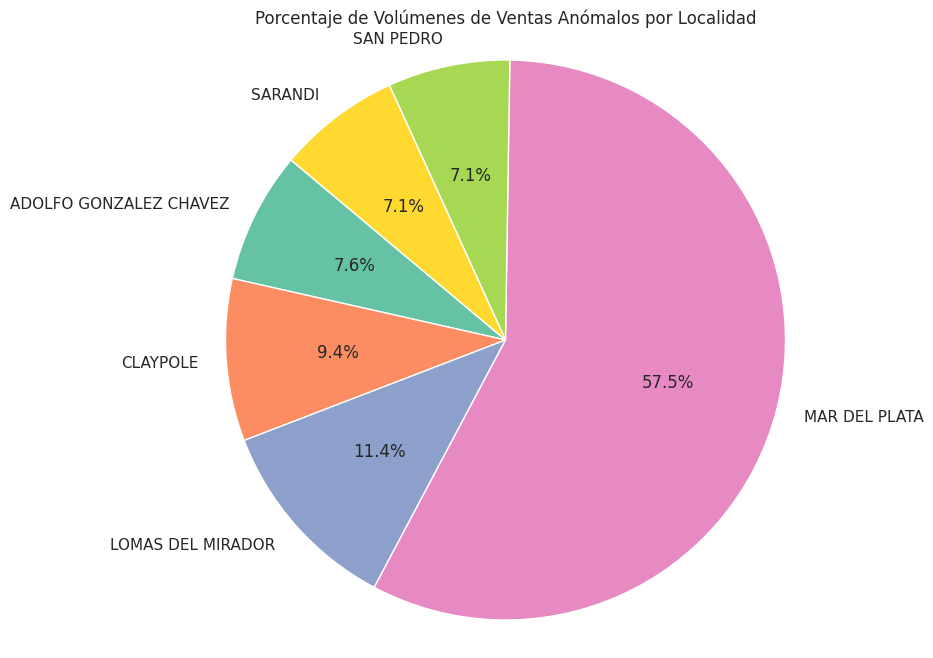

In [86]:
# Agrupar por localidad y sumar los volúmenes de ventas anómalos
volumenes_anomalos_por_localidad = anomalías_volumen.groupby('Localidad')['Volumen_Total'].sum().reset_index()

# Mostrar la suma de volúmenes anómalos por localidad
print("Volúmenes de ventas anómalos por localidad:")
print(volumenes_anomalos_por_localidad)

# Calcular el total de volúmenes anómalos
total_volumenes_anomalos = volumenes_anomalos_por_localidad['Volumen_Total'].sum()

# Calcular el porcentaje de cada localidad
volumenes_anomalos_por_localidad['Porcentaje'] = (volumenes_anomalos_por_localidad['Volumen_Total'] / total_volumenes_anomalos) * 100

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear gráfico de pastel
plt.figure(figsize=(10, 8))
plt.pie(volumenes_anomalos_por_localidad['Porcentaje'],
        labels=volumenes_anomalos_por_localidad['Localidad'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Set2'))

# Mejorar la visualización
plt.title('Porcentaje de Volúmenes de Ventas Anómalos por Localidad')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Diagrama de Dispersión para Volúmenes de Ventas Anómalos

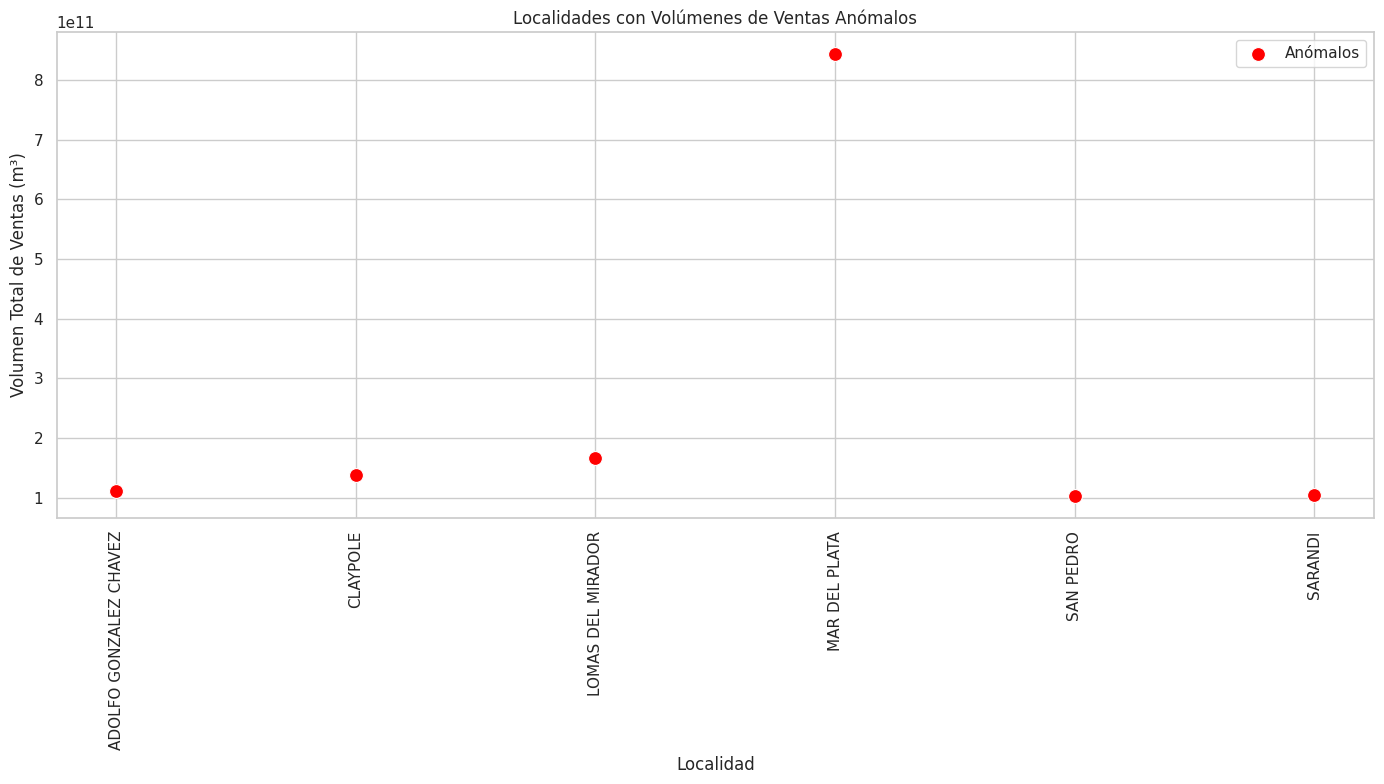

In [87]:
# Diagrama de dispersión para volúmenes de ventas anómalos
plt.figure(figsize=(14, 8))

# Solo localidades con volúmenes anómalos
sns.scatterplot(data=anomalías_volumen, x='Localidad', y='Volumen_Total', color='red', s=100, label='Anómalos')

# Mejorar la visualización
plt.title('Localidades con Volúmenes de Ventas Anómalos')
plt.xlabel('Localidad')
plt.ylabel('Volumen Total de Ventas (m³)')
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visibilidad
plt.grid(True)
plt.tight_layout()

plt.show()

Este gráfico muestra que los valores con mayor dispersión , pertenecen a Mar del Plata. Por lo tanto es la localidad con mayor variación en los volúmenes de ventas de combustibles.

# Diagrama de Dispersión para Precios Anómalos

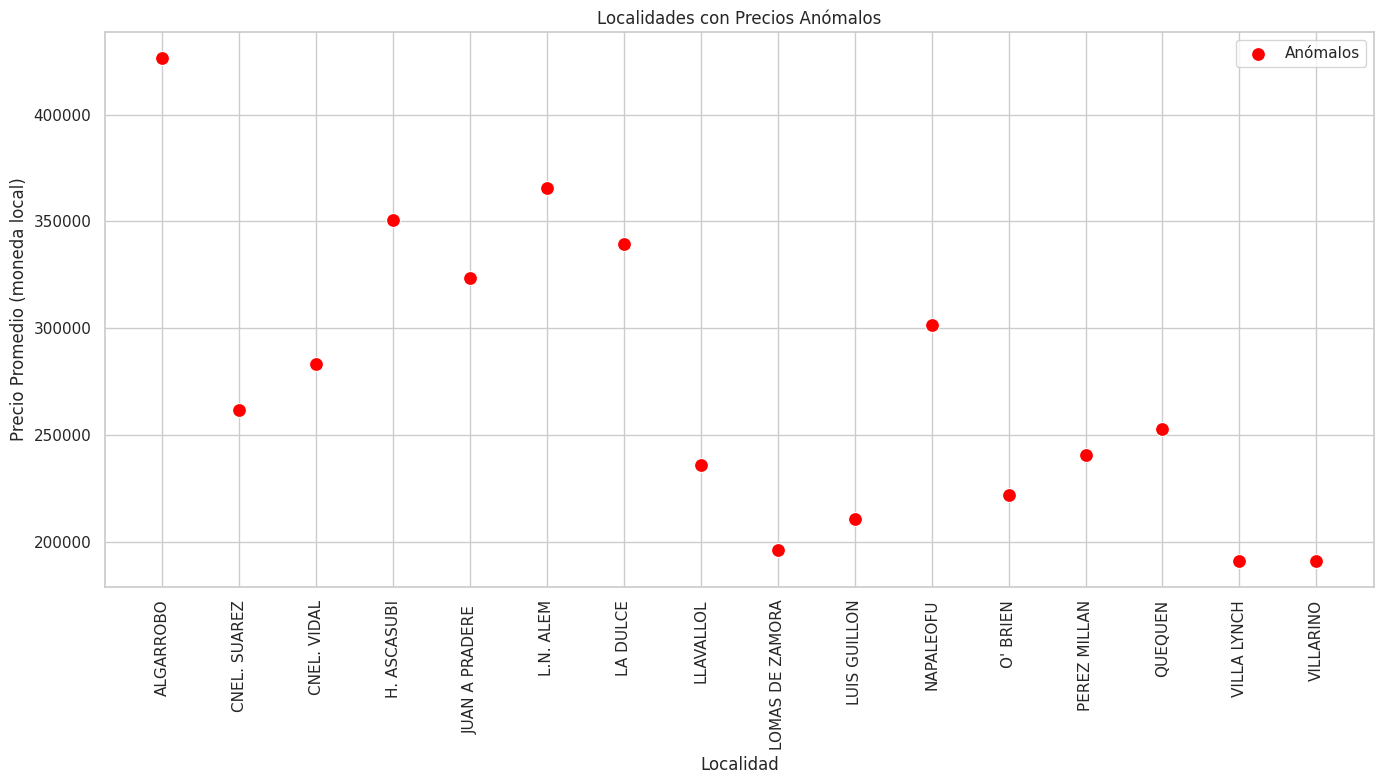

In [88]:
# Diagrama de dispersión para precios anómalos
plt.figure(figsize=(14, 8))

# Solo localidades con precios anómalos
sns.scatterplot(data=anomalías_precio, x='Localidad', y='Precio_Promedio', color='red', s=100, label='Anómalos')

# Mejorar la visualización
plt.title('Localidades con Precios Anómalos')
plt.xlabel('Localidad')
plt.ylabel('Precio Promedio (moneda local)')
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visibilidad
plt.grid(True)
plt.tight_layout()

plt.show()

Existe mucha variación en los precios de venta de combustible en las localidades, sobre todo en las que muestra el gráfico.

# Gráfico para Volúmenes de Ventas Anómalos

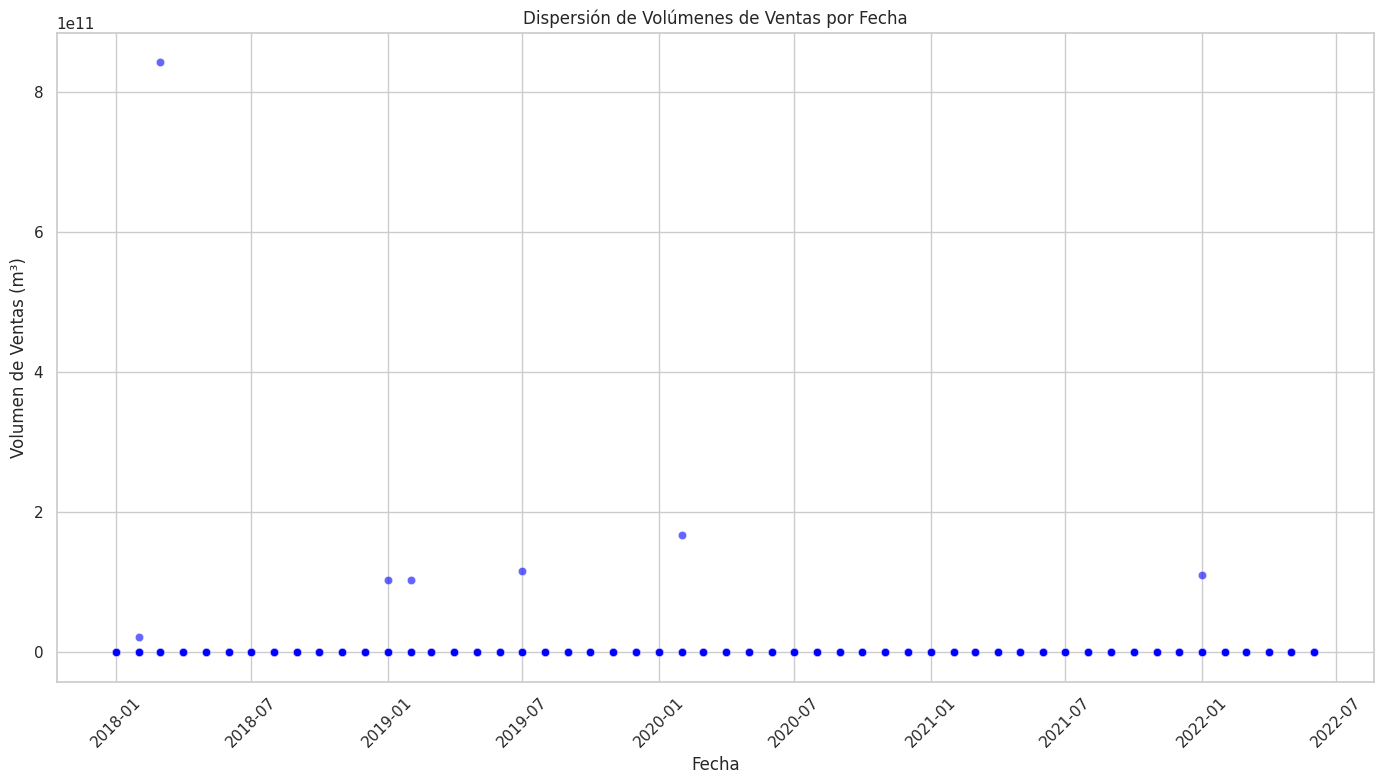

In [89]:
# Diagrama de dispersión para volúmenes de ventas
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_buenos_aires, x='Fecha', y='Volumen', alpha=0.6, color='blue')

# Mejorar la visualización
plt.title('Dispersión de Volúmenes de Ventas por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Volumen de Ventas (m³)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

EL 2018 fue el año con mayor variación en el volumen de ventas.

# Gráfico de Caja para Precios con Rango Ajustado

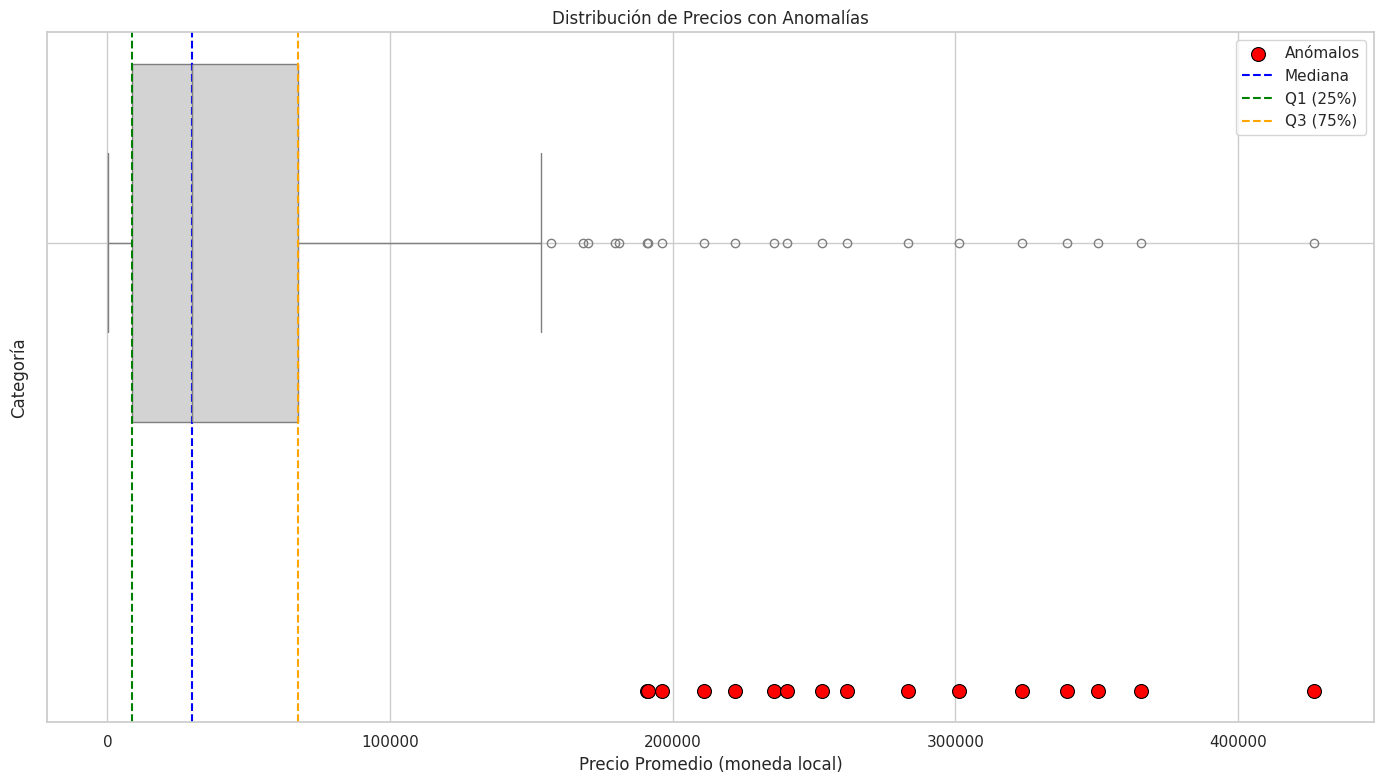

In [90]:
plt.figure(figsize=(14, 8))

# Gráfico de caja para precios
sns.boxplot(data=estadisticas_ba, x='Precio_Promedio', color='lightgray')

# Añadir puntos para anomalías
sns.scatterplot(data=anomalías_precio, x='Precio_Promedio', y=[1]*len(anomalías_precio), color='red', s=100, label='Anómalos', edgecolor='black')

# Añadir líneas de referencia para mediana y cuartiles
median = estadisticas_ba['Precio_Promedio'].median()
q1 = estadisticas_ba['Precio_Promedio'].quantile(0.25)
q3 = estadisticas_ba['Precio_Promedio'].quantile(0.75)
plt.axvline(median, color='blue', linestyle='--', label='Mediana')
plt.axvline(q1, color='green', linestyle='--', label='Q1 (25%)')
plt.axvline(q3, color='orange', linestyle='--', label='Q3 (75%)')

# Mejorar la visualización
plt.title('Distribución de Precios con Anomalías')
plt.xlabel('Precio Promedio (moneda local)')
plt.ylabel('Categoría')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

Distribución de Precios con Anomalías

Descripción: Este gráfico utiliza un diagrama de caja (box plot) para ilustrar la distribución de precios promedios, donde se marcan puntos específicos como anomalías destacadas en color rojo.

Interpretación:
Mediana y cuartiles: La línea horizontal indica la mediana, y las líneas verticales que marcan Q1 (25%) y Q3 (75%) ayudan a visualizar la dispersión de los datos.

Anomalías: Los puntos rojos son valores atípicos, que se encuentran por encima de Q3. Esto indica que hay ciertos precios que son significativamente más altos que el resto, lo que puede requerir una investigación adicional. Pueden ser indicadores de datos erróneos o casos excepcionales que merecen atención.

#TRATAMIENTO DE LOS OUTLIERS

In [91]:
from scipy.stats import zscore

# Supongamos que estadisticas_ba es el DataFrame que contiene los datos de volumen total y precio promedio

# Calcular el Z-score para detectar outliers en las columnas de interés
estadisticas_ba['Z_Volumen'] = zscore(estadisticas_ba['Volumen_Total'])
estadisticas_ba['Z_Precio'] = zscore(estadisticas_ba['Precio_Promedio'])

# Establecer umbral para identificar outliers (e.g., Z > 3 o Z < -3)
umbral = 3

# Filtrar outliers para el volumen total
sin_outliers_volumen = estadisticas_ba[(estadisticas_ba['Z_Volumen'].abs() <= umbral)]

# Filtrar outliers para el precio promedio
sin_outliers_precio = estadisticas_ba[(estadisticas_ba['Z_Precio'].abs() <= umbral)]

# Combinar ambos filtros (puedes ajustarlo según tus necesidades)
sin_outliers = estadisticas_ba[(estadisticas_ba['Z_Volumen'].abs() <= umbral) &
                               (estadisticas_ba['Z_Precio'].abs() <= umbral)]

# Eliminar columnas temporales de Z-score si ya no se necesitan
sin_outliers = sin_outliers.drop(columns=['Z_Volumen', 'Z_Precio'])

# Ahora sin_outliers contiene el DataFrame corregido sin los outliers
print(sin_outliers.head())

      Localidad  Volumen_Total  Volumen_Promedio  Volumen_Mediana  \
0    25 DE MAYO   1.448886e+07      31773.822254           75.655   
1  3 DE FEBRERO   4.012340e+06      15140.904113           67.210   
2  30 DE AGOSTO   2.513491e+07      79540.851044        33924.500   
3    9 DE ABRIL   5.176971e+07      42538.789942         5956.000   
4    9 DE JULIO   7.645450e+07      46505.171864          135.205   

   Volumen_Desviacion  Precio_Promedio  Precio_Mediana  Precio_Desviacion  \
0        54449.470924     16900.827368         101.600       32298.196166   
1        30812.802055    151732.872151         106.420      229928.822910   
2       126589.329354     99352.748987          84.085      252457.309684   
3        66164.462404     33514.734634         108.950       99337.190410   
4        79729.568791     37945.915554       21475.500       59153.727135   

   Anio_Inicial  Anio_Final  Mes_Inicial  Mes_Final  
0          2018        2022            1         12  
1          201

#                 IMPLEMENTACIÓN DEL MODELO PREDICTIVO




Utilizamos dos modelos de Machine Learning con validación cruzada. Utilizaremos un modelo de Regresión Lineal y otro de Random Forest como ejemplos:

1. Entrenamiento y Testeo de Modelos
Primero, separamos los datos en características (X) y la variable objetivo (y). Luego, realizamos la validación cruzada con KFold.

In [92]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Asignar los datos sin outliers a las variables de entrenamiento para Separar los datos en entrenamiento y prueba
X = sin_outliers.drop('Precio_Promedio', axis=1)
y = sin_outliers['Precio_Promedio']

# Identify Non-Numeric Features:
non_numeric_cols = X.select_dtypes(exclude=np.number).columns.tolist()

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output

# Fit the encoder on the data
encoder.fit(X[non_numeric_cols])

# Transform data
encoded_data = encoder.transform(X[non_numeric_cols])

# Create column names for the encoded features
encoded_cols = encoder.get_feature_names_out(non_numeric_cols)

# Create DataFrame for the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=X.index)

# Drop original categorical columns and add encoded columns to training and testing data
X = X.drop(columns=non_numeric_cols).join(encoded_df)

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert all columns to numeric:
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# Impute missing values (e.g., with the mean)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


# Crear el KFold para validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Modelo 1: Regresión Lineal
model_lr = LinearRegression()
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Modelo 2: Random Forest
model_rf = RandomForestRegressor(random_state=42)
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

print("MSE Regresión Lineal (CV):", -scores_lr.mean())
print("MSE Random Forest (CV):", -scores_rf.mean())

MSE Regresión Lineal (CV): 10909440913.016117
MSE Random Forest (CV): 170318836.9106614


2. Optimización de Hiperparámetros
Aplicamos GridSearchCV o RandomizedSearchCV para optimizar los hiperparámetros de los modelos.

In [93]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# GridSearch para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print("Mejores Hiperparámetros Random Forest:", grid_search_rf.best_params_)
print("Mejor MSE (Random Forest):", -grid_search_rf.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores Hiperparámetros Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Mejor MSE (Random Forest): 163410248.5798513


3. Evaluación y Selección de Modelos

Finalmente, seleccionamos el mejor modelo basado en las métricas obtenidas: el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²).

In [94]:
# Entrenar el mejor modelo Random Forest en todos los datos de entrenamiento
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred_rf = best_rf.predict(X_test)

# Calcular métricas
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("MSE Random Forest en datos de prueba:", mse_rf)
print("R² Random Forest en datos de prueba:", r2_rf)

# Puedes comparar estas métricas con las obtenidas por el modelo de Regresión Lineal

MSE Random Forest en datos de prueba: 204033591.98844916
R² Random Forest en datos de prueba: 0.9308324843171557


#INTERPRETACIÓN

Interpretación de los Resultados

MSE (Error Cuadrático Medio)

Valor: 204033591.98844916

Interpretación:

El MSE representa la diferencia cuadrática promedio entre los valores predichos y los valores reales. Generalmente, un MSE más bajo es mejor, ya que indica menos error en las predicciones. Sin embargo, la magnitud del MSE depende en gran medida de la escala de tu variable objetivo ('Precio_Promedio' en tu caso). Dado que el MSE es bastante grande, sugiere que las predicciones del modelo pueden estar desviadas por una cantidad significativa en las unidades originales de tu variable objetivo.

R² (R-cuadrado)

Valor: 0.9308324843171557

Interpretación:

El valor R², también conocido como coeficiente de determinación, indica la proporción de la varianza en la variable objetivo que se explica por el modelo. Un valor R² más alto sugiere un mejor ajuste, siendo 1 un ajuste perfecto. El R² de 0.93 es muy alto, lo que indica que el modelo explica aproximadamente el 93% de la variabilidad en 'Precio_Promedio'.

Interpretación General

La combinación de un MSE alto y un R² alto puede parecer contradictoria. Aquí te explico cómo conciliar estos hallazgos:

Escala de la Variable Objetivo:

El MSE grande probablemente se deba a la escala de tu variable objetivo. Si 'Precio_Promedio' tiene un rango amplio de valores, incluso pequeños errores de predicción pueden llevar a un MSE grande.

Ajuste del Modelo:

El R² alto sugiere que, a pesar de los posibles errores absolutos grandes, el modelo está capturando eficazmente las tendencias y relaciones generales en los datos. Puede predecir la dirección de los cambios en 'Precio_Promedio' con buena precisión, incluso si los valores predichos precisos pueden estar desviados.

Consideraciones

Contexto Empresarial: La importancia del MSE y el R² depende de los objetivos empresariales específicos. Si las predicciones precisas son cruciales, el MSE grande podría ser preocupante. Sin embargo, si capturar las tendencias generales es suficiente, el R² alto podría ser satisfactorio, como es en nuestro caso.

Mejora del Modelo: A pesar del buen R², siempre hay margen de mejora. Se podría explorar la ingeniería de características, probar diferentes hiperparámetros del modelo o considerar modelos más avanzados para reducir potencialmente el MSE.

#Gráfico de Resultados de los Modelos

Dado que el 𝑅2 es tan negativo, cualquier gráfico de predicciones versus valores reales mostrará una pobre alineación. No obstante, para fines de análisis, el siguiente código genera un gráfico comparativo de las predicciones de ambos modelos:

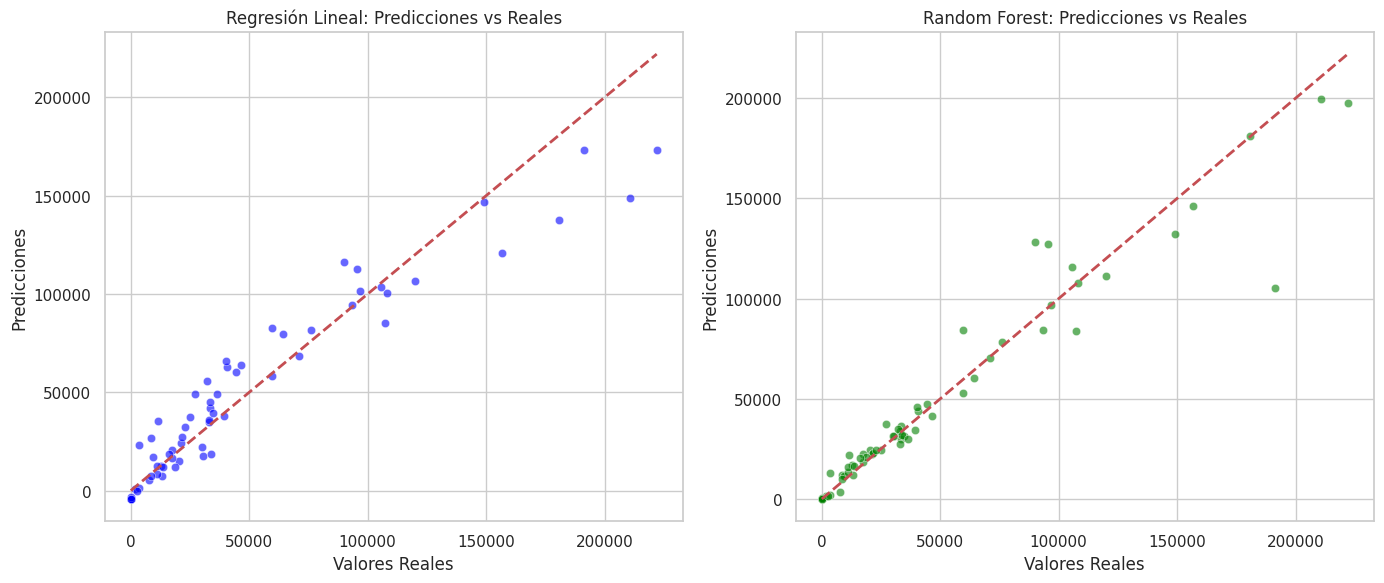

In [95]:
# Predicciones de ambos modelos
y_pred_lr = model_lr.fit(X_train, y_train).predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# Crear el gráfico de dispersión
plt.figure(figsize=(14, 6))

# Gráfico para Regresión Lineal
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Regresión Lineal: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)

# Gráfico para Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, color="green", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest: Predicciones vs Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)

plt.tight_layout()
plt.show()

Ambos modelos muestran predicciones muy buenas.

 Regresión Lineal y Random Forest

Regresión Lineal (izquierda):

Descripción: Los puntos azules representan las predicciones realizadas por el modelo de regresión lineal en comparación con los valores reales.

Interpretación: Hay una buena correlación entre las predicciones y los valores reales, como lo indica la alineación de los puntos cerca de la línea roja discontinua (que representa la idealidad perfecta donde las predicciones igualan los valores reales). Esto sugiere que el modelo de regresión lineal está funcionando de manera efectiva.

Random Forest (derecha):

Descripción: Los puntos verdes muestran las predicciones del modelo de Random Forest frente a los valores reales.

Interpretación: Aquí se observa una mayor dispersión de los puntos respecto a la línea ideal. Esto indica que, aunque el modelo Random Forest puede capturar algunas tendencias, hay una cantidad considerable de errores en las predicciones, lo que puede sugerir sobreajuste o que el modelo no está capturando adecuadamente la relación en los datos.

#Conclusión
Los modelos de predicción tienen rendimientos variables, con la regresión lineal mostrando un mejor ajuste en este caso.

Acciones Futuras

Es crucial identificar y analizar las anomalías en la distribución de precios, ya que pueden afectar decisiones comerciales y modelado posterior. Esto sugiere un área de interés para la exploración más profunda en los datos.

Además es preciso realizar el análisis con el resto de las provincias.